## Clustering factors vs. mass.

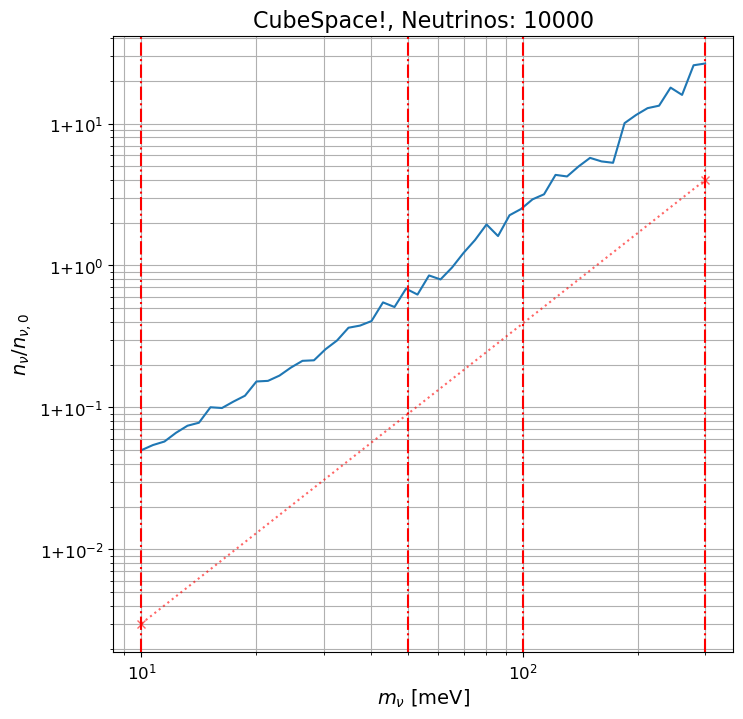

Max value: 27.472544292387205 26.472544292387205


In [1]:
from shared.preface import *
import shared.functions as fct

# Load data.
nus = 10000
u_all = fct.load_u_sim(nus, discrete=True)

def number_density_1_mass(m_nu_eV, average:bool):

    n_nus = np.zeros(len(m_nu_eV))
    for i, m_eV in enumerate(m_nu_eV):

        # Get momenta.
        p, _ = fct.u_to_p_eV(u_all, m_eV)

        if average and m_eV >= 0.01:
            # Calculate number density, averaged values for z in [3.5, 4].
            idx = np.array(np.where(ZEDS >= 2.0)).flatten()

            temp = np.zeros(len(idx))
            for j,k in enumerate(idx):
                val = fct.number_density(p[:,0], p[:,k])
                temp[j] = val

            n_nus[i] = np.mean(temp)

        else:
            n_nus[i] = fct.number_density(p[:,0], p[:,-1])

    np.save(
        f'neutrino_data/clustering_factors_nus_{nus}_CubeSpace.npy', 
        n_nus
        )


# 10 to 300 meV like in the paper.
mass_range_eV = np.geomspace(0.01, 0.3, 50)*eV

number_density_1_mass(mass_range_eV, average=True)
n_nus = np.load(
    f'neutrino_data/clustering_factors_nus_{nus}_CubeSpace.npy'
    )/N0

# Plotting:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(mass_range_eV*1e3, (n_nus-1))
x_ends = [1e1, 3*1e2]
y_ends = [3*1e-3, 4]
ax.plot(x_ends, y_ends, marker='x', ls=':', c='r', alpha=0.6)

for m in NU_MASSES:
    ax.axvline(m*1e3, c='r', ls='-.')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'CubeSpace!, Neutrinos: {nus}')
ax.set_xlabel(r'$m_{\nu}$ [meV]')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
# ax.set_ylim(1e-3, 1e1)
plt.grid(True, which="both", ls="-")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))

plt.savefig(f'figures/clustering_factors_nus_{nus}_CubeSpace.pdf')
plt.show()

print('Max value:', np.max(n_nus), np.max(n_nus-1))